# Off-Platform Project: Viral Tweets

In this project, we are going to use the K-Nearest Neighbor algorithm to predict whether a tweet will go viral. Before jumping into using the classifier, let's first consider the problem we're trying to solve. Which features of a tweet are most closely linked to its popularity? Maybe the number of hashtags or the number of links in the tweet strongly influences its popularity. Maybe its virality is dependent on how many followers the person has. Maybe it's something more subtle like the specific language used in the tweets.

Let's explore these options by looking at the data!

In [2]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])
print(all_tweets.loc[0]['user']['screen_name'])
print(all_tweets.loc[0]['user']['location'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…
derekw221
Waterloo, Iowa


# Defining Viral Tweets

A K-Nearest Neighbor classifier is a supervised machine learning algorithm, and as a result, we need to have a dataset with tagged labels. For this specific example, we need a dataset where every tweet is marked as viral or not viral. Unfortunately, this isn't a feature of our dataset &mdash; we'll need to make it ourselves.

So how do we define a viral tweet? A good place to start is to look at the number of retweets the tweet has. Let's use the median number of retweets.

In [4]:
print(all_tweets['retweet_count'].median())

13.0


In [5]:
import numpy as np

all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] >= all_tweets['retweet_count'].median(),1,0)

print(all_tweets.is_viral.value_counts())

1    5591
0    5508
Name: is_viral, dtype: int64


# Making Features

Now that we've created a label for every tweet in our dataset, we can begin thinking about which features might determine whether a tweet is viral. We can create new columns in our dataset to represent these features.

Create a new column called `followers_count` and `friends_count` that contains the number of followers and friends of each user.

In [6]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)

In [13]:
all_tweets['followers_count'] = all_tweets.apply(lambda x: x['user']['followers_count'], axis=1)

In [15]:
all_tweets['friends_count'] = all_tweets.apply(lambda x: x['user']['friends_count'], axis=1)

# Normalizing The Data

We've now made the columns that we want to feed into our classifier. Let's get rid of all the data that is no longer relevant. 
Create a new variable named `scaled_data`. `scaled_data` should be the result of the `scale` function with `data` as a parameter. The scale function will normalize the data so all of the features will vary within the same range.

In [16]:
from sklearn.preprocessing import scale

labels = all_tweets['is_viral']
data = all_tweets[['tweet_length','followers_count','friends_count']]
scaled_data = scale(data, axis=0)

print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305]


# Creating the Training Set and Test Set

To evaluate the effectiveness of our classifier, we now split `scaled_data` and `labels` into a training set and test set using scikit-learn's `train_test_split` function.

In [17]:
from sklearn.model_selection import train_test_split

data_train, data_test, label_train, label_test = train_test_split(scaled_data, labels, test_size = .2, random_state=1)

# Using the Classifier

We can finally use the K-Nearest Neighbor classifier. Let's test it using `k = 5`.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(data_train, label_train)
classifier.score(data_test, label_test)

0.5905405405405405

# Choosing K

We've tested our classifier with `k = 5`, but maybe there's a `k` that will work better. Let's test many different values for `k` and graph the results. 

In [19]:
import matplotlib.pyplot as plt

In [20]:
score = []

for k in range(1,201):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(data_train,label_train)
    score.append(classifier.score(data_test,label_test))

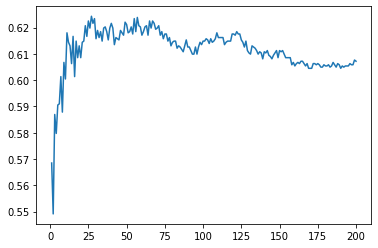

In [22]:
plt.plot(range(1,201),score)
plt.show()

# Explore on your own

Nice work! We can see the classifier gets better as `k` increases, but as `k` gets too high, underfitting starts to happen.

By using the features `tweet_length`, `followers_count`, and `friends_count`, we were able to get up to around 63% accuracy. That is better than random, but still not exceptional.